In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.insert(0, '/home/brysongray/fibermetric/')
from fibermetric import histology, sta_validate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from scipy.ndimage import gaussian_filter,sobel,correlate1d,gaussian_filter1d
import cv2
import scipy
import pandas as pd
import itertools

[0.25       0.77777778 1.30555556 1.83333333 2.36111111 2.88888889
 3.41666667 3.94444444 4.47222222 5.        ]
[ 5.          6.33333333  7.66666667  9.         10.33333333 11.66666667
 13.         14.33333333 15.66666667 17.        ]
[1.0, 1.1428571428571428, 1.3333333333333333, 1.6, 2.0, 3.0, 4.0, 5.0]


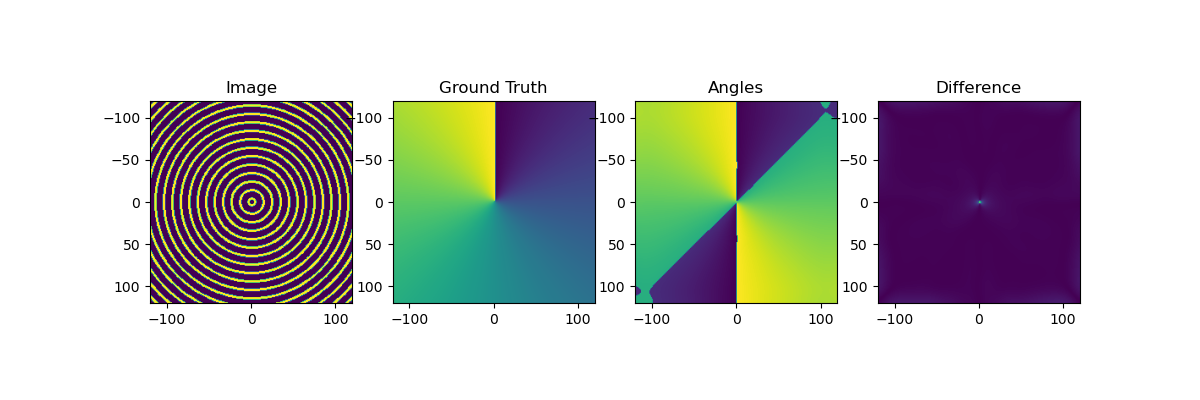

pixelwise error: 1.1067319002167915


In [ ]:
width = 2
derivative_sigmas = np.linspace(start=0.25, stop=5.0, num=10)
tensor_sigmas = np.linspace(start=5.0, stop=17.0, num=10)
# derivative_sigmas = np.arange(start=1/width, stop=width*5,step=width/2)
# tensor_sigmas = np.arange(start=1/width, stop=width*5,step=width/2)
anisotropy = [(240,240), (210,240),(180,240),(150,240),(120,240),(80,240),(60,240),(48,240)]
AI_ratio = [a[1]/a[0] for a in anisotropy]
print(derivative_sigmas)
print(tensor_sigmas)
print(AI_ratio)
d = 4
t = 4
a = 0
err_type = 'pixelwise'
error = sta_validate.phantom_test(derivative_sigmas[d], tensor_sigmas[t], anisotropy[a], period=10, noise=0.0, width=width, phantom='circles', err_type=err_type, display=True) # , grid_thetas=(-np.pi/6,np.pi/3)
print(f'{err_type} error: {error}')

In [ ]:
width = 2
periods = [5,10,15]
derivative_sigmas = np.linspace(start=0.25, stop=5.0, num=10)
tensor_sigmas = np.linspace(start=5.0, stop=30.0, num=10)
print(derivative_sigmas)
print(tensor_sigmas)
anisotropy = [(240,240), (210,240),(180,240),(150,240),(120,240),(80,240),(60,240),(48,240)]
errors = sta_validate.run_tests(derivative_sigmas=derivative_sigmas, tensor_sigmas=tensor_sigmas, nIs=anisotropy, periods=periods, widths=width, noises=0.0, phantom='circles', err_type='pixelwise')

[0.25       0.77777778 1.30555556 1.83333333 2.36111111 2.88888889
 3.41666667 3.94444444 4.47222222 5.        ]
[ 5.          7.77777778 10.55555556 13.33333333 16.11111111 18.88888889
 21.66666667 24.44444444 27.22222222 30.        ]


  0%|          | 0/2400 [00:00<?, ?it/s]